In [1]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install gcvit
!pip install tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 66.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.8/15.8 MB 74.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 KB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 KB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 KB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.9/140.9 KB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 KB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.5/106.5 KB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 69.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 KB

In [3]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds

tfds.disable_progress_bar()

import os
import sys
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
! mkdir ~/.kaggle

In [5]:
! cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
! kaggle datasets download vivektalwar1234/grace-data

100% 1.99G/1.99G [01:47<00:00, 20.1MB/s]
100% 1.99G/1.99G [01:47<00:00, 19.8MB/s]


In [8]:
!unzip /content/grace-data.zip

Archive:  /content/grace-data.zip
  inflating: grace_data/test/non-suspicious/008449240133_1_left.jpg  
  inflating: grace_data/test/non-suspicious/008449240133_1_others2.jpg  
  inflating: grace_data/test/non-suspicious/008449240133_1_right.jpg  
  inflating: grace_data/test/non-suspicious/008449240133_1_top.jpg  
  inflating: grace_data/test/non-suspicious/020902436774_1_bottom.jpg  
  inflating: grace_data/test/non-suspicious/020902436774_1_left.jpg  
  inflating: grace_data/test/non-suspicious/020902436774_1_others.jpg  
  inflating: grace_data/test/non-suspicious/037550143299_1_left.jpg  
  inflating: grace_data/test/non-suspicious/037550143299_1_right.jpg  
  inflating: grace_data/test/non-suspicious/037550143299_1_top.jpg  
  inflating: grace_data/test/non-suspicious/066524358940_1_left.jpg  
  inflating: grace_data/test/non-suspicious/066524358940_1_top.jpg  
  inflating: grace_data/test/non-suspicious/074834553125_1_left.jpg  
  inflating: grace_data/test/non-suspicious/074834

In [9]:
# remove warnings
import warnings
warnings.filterwarnings("ignore")

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
import numpy as np

In [12]:
import pandas as pd

In [13]:
import os

In [14]:
import numpy as np
import pandas as pd
import os
import random
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt 
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Layer, Flatten, Embedding, Reshape
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Input
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tqdm import tqdm
import plotly.express as px
import torch
import torchvision
from torchvision import transforms as T # for simplifying the transforms
plt.rcParams['font.size'] =  12

In [15]:
## Now, we import timm, torchvision image models
!pip install timm # kaggle doesnt have it installed by default
import timm
from timm.loss import LabelSmoothingCrossEntropy # This is better than normal nn.CrossEntropyLoss

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.1/549.1 KB 40.6 MB/s eta 0:00:00


In [16]:
# remove warnings
import warnings
warnings.filterwarnings("ignore")

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
import sys
from tqdm import tqdm
import time
import copy

In [19]:
import torch
import torchvision
from torchvision import datasets
from torchvision import transforms as T # for simplifying the transforms
from torch import nn, optim
from torch.nn import functional as F
from torch.utils.data import DataLoader, sampler, random_split
from torchvision import models

In [20]:
def get_classes(data_dir):
    all_data = datasets.ImageFolder(data_dir)
    return all_data.classes

In [21]:
def get_data_loaders(data_dir, batch_size, train = False):
    if train:
        #train
        transform = T.Compose([
            T.RandomHorizontalFlip(),
            T.RandomVerticalFlip(),
            T.RandomApply(torch.nn.ModuleList([T.ColorJitter()]), p=0.25),
            T.Resize(256),
            T.CenterCrop(224),
            T.ToTensor(),
            T.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)), # imagenet means
            T.RandomErasing(p=0.2, value='random')
        ])
        train_data = datasets.ImageFolder(os.path.join(data_dir, "train/"), transform = transform)
        train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=4)
        return train_loader, len(train_data)
    else:
        # val/test
        transform = T.Compose([ # We dont need augmentation for test transforms
            T.Resize(256),
            T.CenterCrop(224),
            T.ToTensor(),
            T.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)), # imagenet means
        ])
        val_data = datasets.ImageFolder(os.path.join(data_dir, "val/"), transform=transform)
        test_data = datasets.ImageFolder(os.path.join(data_dir, "test/"), transform=transform)
        val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=True, num_workers=4)
        test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=True, num_workers=4)
        return val_loader, test_loader, len(val_data), len(test_data)


In [22]:

dataset_path = "/content/grace_data"

train_dir = "/content/grace_data/train"

val_dir = "/content/grace_data/val"

test_dir = "/content/grace_data/test"

In [23]:
import os
(train_loader, train_data_len) = get_data_loaders(dataset_path, 128, train=True)
(val_loader, test_loader, valid_data_len, test_data_len) = get_data_loaders(dataset_path, 32, train=False)

In [24]:

classes = get_classes("/content/grace_data/train")
print(classes, len(classes))

['non-suspicious', 'suspicious'] 2


In [25]:
dataloaders = {
    "train": train_loader,
    "val": val_loader
}
dataset_sizes = {
    "train": train_data_len,
    "val": valid_data_len
}

In [26]:
print(len(train_loader), len(val_loader), len(test_loader))

11 13 14


In [27]:
print(train_data_len, valid_data_len, test_data_len)

1344 412 440


In [28]:
# Set up variables for pre-processing
batch_size = 16
epochs = 50
IMG_HEIGHT = 224
IMG_WIDTH = 224

Class names:  ['non-suspicious' 'suspicious']
Found 1344 images belonging to 2 classes.


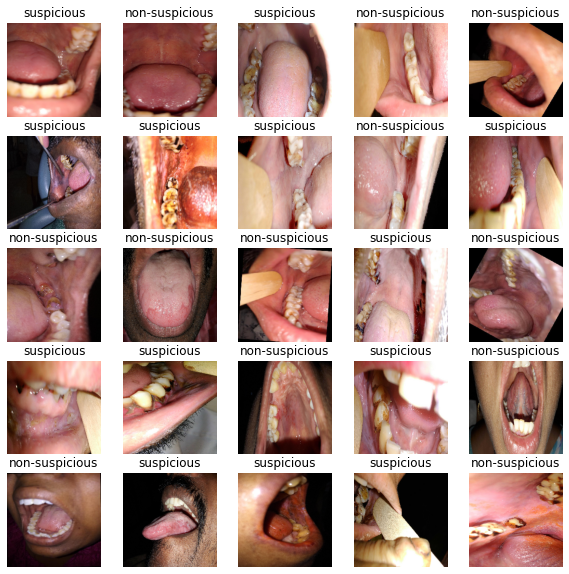

In [29]:

import scipy

import os
import pathlib
from time import time
# Visualize some images
train_root = pathlib.Path(train_dir)
class_names = sorted([j.name.split('/')[-1] for j in train_root.iterdir()])
class_names = np.array(class_names)
print('Class names: ', class_names)

img_gen = ImageDataGenerator(rescale = 1./255)
sample_train_data_gen = img_gen.flow_from_directory(batch_size = 32,
                                                    directory = train_dir,
                                                    shuffle = True,
                                                    target_size = (IMG_HEIGHT, IMG_WIDTH),
                                                    classes = list(class_names))
                                                 
sample_images, sample_labels = next(sample_train_data_gen)

def show_batch(img_batch, label_batch):
    plt.figure(figsize = (10, 10))
    for i in range(25):
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(sample_images[i])
        plt.title(class_names[sample_labels[i] == 1][0])
        plt.axis('off')
        
show_batch(sample_images, sample_labels)

In [30]:
batch_size=16

In [31]:
train_image_generator = ImageDataGenerator(rescale = 1./255,
                                           rotation_range = 45,
                                           width_shift_range = 0.20,
                                           height_shift_range = 0.20,
                                           horizontal_flip = True,
                                           zoom_range = 0.5)

val_image_generator = ImageDataGenerator(rescale = 1./255)
test_image_generator = ImageDataGenerator(rescale = 1./255)

train_data_gen = train_image_generator.flow_from_directory(batch_size = batch_size,
                                                           directory = train_dir,
                                                           shuffle = True,
                                                           target_size = (IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode = 'categorical')

val_data_gen = val_image_generator.flow_from_directory(batch_size = batch_size,
                                                       directory = val_dir,
                                                       target_size = (IMG_HEIGHT, IMG_WIDTH),
                                                       class_mode = 'categorical')

test_data_gen = test_image_generator.flow_from_directory(test_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 batch_size=batch_size,
                                                 shuffle=False,
                                                 class_mode='categorical')

Found 1344 images belonging to 2 classes.
Found 412 images belonging to 2 classes.
Found 440 images belonging to 2 classes.


In [32]:

# now, for the model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [33]:


img_size = 512
base_model = DenseNet201(include_top = False,
                       weights = 'imagenet',
                       input_shape = (img_size,img_size,3))

74836368/74836368 [==============================] - 5s 0us/step


In [34]:
base_model.summary()

Model: "densenet201"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 518, 518, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 256, 256, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                        

In [35]:
last_output = base_model.output
x = GlobalAveragePooling2D()(last_output)
x = Dense(512, activation='relu')(x)
outputs = Dense(2, activation='softmax')(x)
model = Model(inputs=base_model.inputs, outputs=outputs)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [36]:
model_name = "DenseNet201.h5"
checkpoint = ModelCheckpoint(model_name,
                            monitor="val_loss",
                            mode="min",
                            save_best_only = True,
                            verbose=1)

earlystopping = EarlyStopping(monitor='val_loss',min_delta = 0, patience = 15, verbose = 1, restore_best_weights=True)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.3, 
                                            min_lr=0.00000001)

In [37]:

history = model.fit(train_data_gen,
                    epochs=50,
                    validation_data=val_data_gen,
                    callbacks=[checkpoint,earlystopping,learning_rate_reduction])

Epoch 1/50
84/84 [==============================] - ETA: 0s - loss: 0.6125 - accuracy: 0.6912
Epoch 1: val_loss improved from inf to 0.82185, saving model to DenseNet201.h5
84/84 [==============================] - 279s 2s/step - loss: 0.6125 - accuracy: 0.6912 - val_loss: 0.8219 - val_accuracy: 0.6165 - lr: 1.0000e-04
Epoch 2/50
84/84 [==============================] - ETA: 0s - loss: 0.4578 - accuracy: 0.7902
Epoch 2: val_loss did not improve from 0.82185
84/84 [==============================] - 168s 2s/step - loss: 0.4578 - accuracy: 0.7902 - val_loss: 0.8822 - val_accuracy: 0.6262 - lr: 1.0000e-04
Epoch 3/50
84/84 [==============================] - ETA: 0s - loss: 0.3833 - accuracy: 0.8162
Epoch 3: val_loss improved from 0.82185 to 0.71472, saving model to DenseNet201.h5
84/84 [==============================] - 171s 2s/step - loss: 0.3833 - accuracy: 0.8162 - val_loss: 0.7147 - val_accuracy: 0.6845 - lr: 1.0000e-04
Epoch 4/50
84/84 [==============================] - ETA: 0s - loss: 

In [38]:

y_test = test_data_gen.classes
y_preds = model.predict(test_data_gen)
y_pred = np.argmax(y_preds,axis=1)

28/28 [==============================] - 68s 2s/step


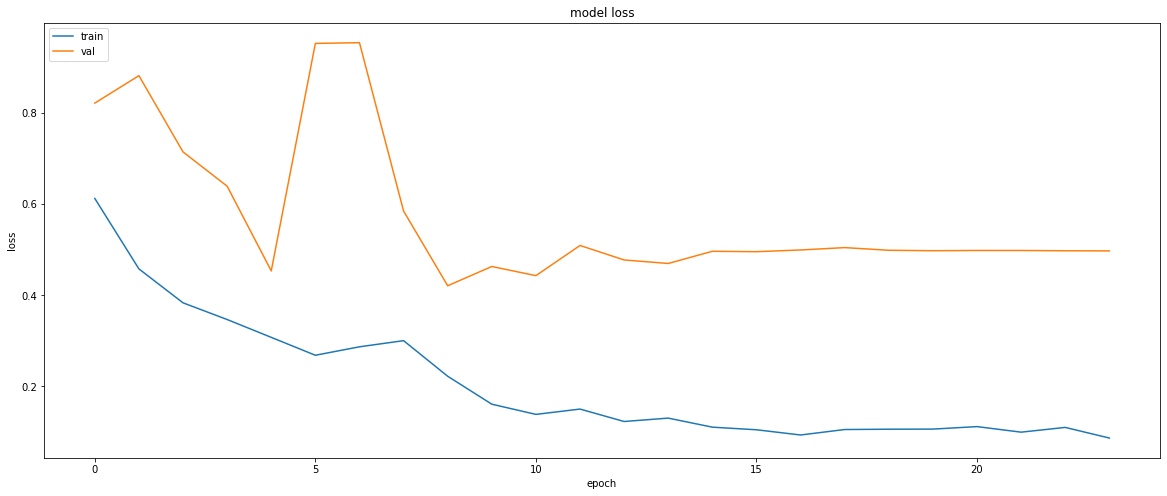

In [39]:
plt.figure(figsize=(20,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

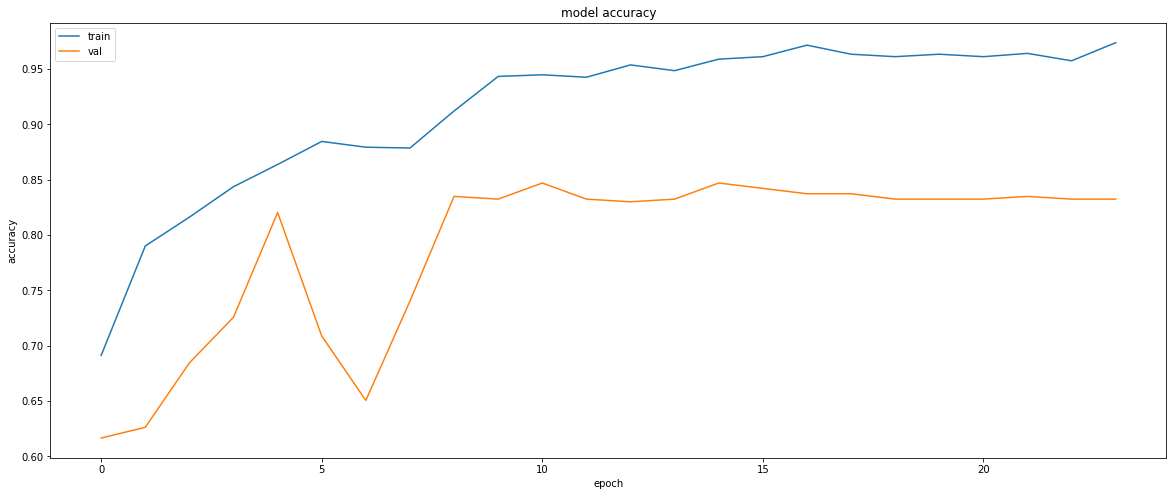

In [40]:
plt.figure(figsize=(20,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [41]:


y_test = test_data_gen.classes
y_preds = model.predict(test_data_gen)
y_pred = np.argmax(y_preds,axis=1)

28/28 [==============================] - 64s 2s/step


In [42]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test,y_pred,target_names = classes))

                precision    recall  f1-score   support

non-suspicious       0.69      0.80      0.74       220
    suspicious       0.77      0.64      0.70       220

      accuracy                           0.72       440
     macro avg       0.73      0.72      0.72       440
  weighted avg       0.73      0.72      0.72       440



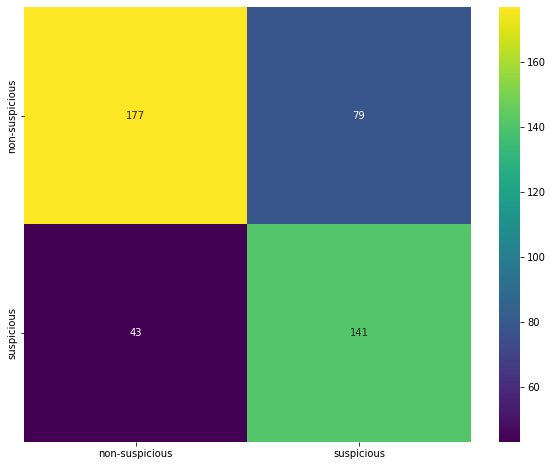

In [43]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_pred,y_test),annot=True,fmt='.3g',xticklabels=classes,yticklabels=classes,cmap='viridis')
plt.show()

In [44]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [50]:
!git clone https://github.com/jacobgil/confidenceinterval

Cloning into 'confidenceinterval'...
remote: Enumerating objects: 66, done.
remote: Counting objects: 100% (66/66), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 66 (delta 33), reused 52 (delta 19), pack-reused 0
Unpacking objects: 100% (66/66), 18.20 KiB | 1.21 MiB/s, done.


In [51]:
import tensorflow as tf
import os
import sys
sys.path.append('/content/confidenceinterval')


from confidenceinterval import roc_auc_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import RepeatedStratifiedKFold, train_test_split

In [55]:
auc, ci = roc_auc_score(y_test, y_pred, confidence_level=0.95)
print(auc)
print(ci)

0.7227273
(0.6815105265554935, 0.763944070917651)


In [67]:
from confidenceinterval import precision_score, recall_score, f1_score

In [73]:
import statsmodels
from statsmodels.stats.proportion import proportion_confint
from sklearn.metrics import confusion_matrix
from scipy.stats import bootstrap
from typing import List, Callable
from functools import partial
import numpy as np
from scipy.stats import norm


In [77]:


from confidenceinterval.bootstrap import bootstrap_ci, bootstrap_methods


In [1]:
print(precision_score(y_test, y_pred, confidence_level=0.95, average ='micro'))
f1_score(y_test, y_pred, confidence_level=0.95, average='macro')

NameError: ignored

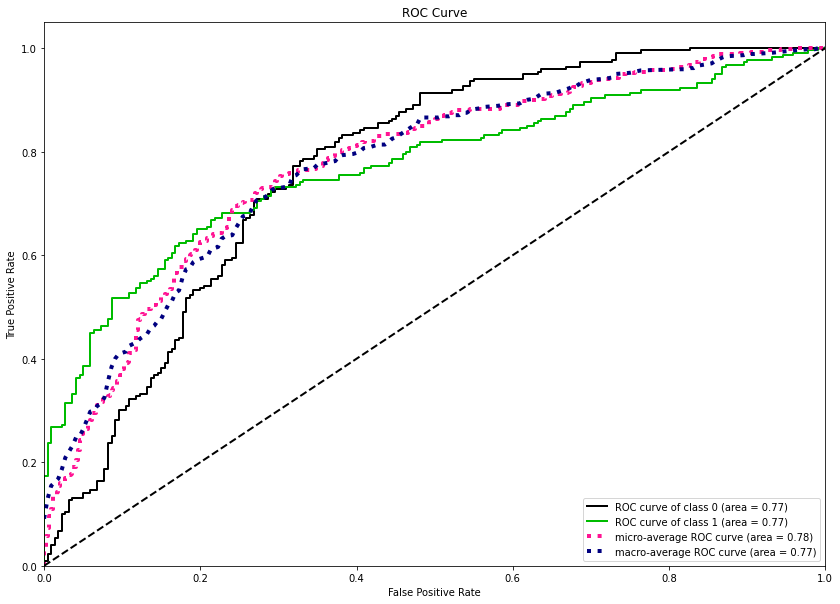

In [83]:
import scikitplot as skplt
import matplotlib.pyplot as plt

# y_test = # ground truth labels
# y_pred = # predicted probabilities generated by sklearn classifier
skplt.metrics.plot_roc_curve(y_test, y_preds, figsize=(14,10), 
                            #  curves=('micro'),
                             title='ROC Curve')

plt.show()

In [84]:

from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred)

0.7227272727272728

In [85]:
test_data_gen = test_image_generator.flow_from_directory(test_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 batch_size=batch_size,
                                                 shuffle=False,
                                                 class_mode='categorical')
# Get the index of the class you're interested in
class_index = test_data_gen.class_indices['non-suspicious']

# Get the IDs of the images in the test set for that class
class_image_ids = [test_data_gen.filenames[i] for i in range(len(test_data_gen.filenames)) if test_data_gen.classes[i] == class_index]

# Print the IDs of the first 10 images in the test set for that class
print(class_image_ids[:100])

Found 440 images belonging to 2 classes.
['non-suspicious/008449240133_1_left.jpg', 'non-suspicious/008449240133_1_others2.jpg', 'non-suspicious/008449240133_1_right.jpg', 'non-suspicious/008449240133_1_top.jpg', 'non-suspicious/020902436774_1_bottom.jpg', 'non-suspicious/020902436774_1_left.jpg', 'non-suspicious/020902436774_1_others.jpg', 'non-suspicious/037550143299_1_left.jpg', 'non-suspicious/037550143299_1_right.jpg', 'non-suspicious/037550143299_1_top.jpg', 'non-suspicious/066524358940_1_left.jpg', 'non-suspicious/066524358940_1_top.jpg', 'non-suspicious/074834553125_1_left.jpg', 'non-suspicious/074834553125_1_others.jpg', 'non-suspicious/074834553125_1_right.jpg', 'non-suspicious/074834553125_1_top.jpg', 'non-suspicious/075125308486_1_others.jpg', 'non-suspicious/075125308486_1_right.jpg', 'non-suspicious/075125308486_1_top.jpg', 'non-suspicious/079739991149_1_bottom.jpg', 'non-suspicious/079739991149_1_others.jpg', 'non-suspicious/079739991149_1_right.jpg', 'non-suspicious/117

In [86]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print(tn)
print(fp)
print(fn)
print(tp)

177
43
79
141


In [87]:
# Specify the class ID for which you want to obtain false negatives
class_id = 1

# Convert the predicted and ground truth labels to boolean arrays
y_pred_bool = (y_pred > 0.5)  # Assuming binary classification task with threshold of 0.5
y_test_bool = (y_test == class_id)

# Obtain the indices of the false negatives for the given class ID
false_neg_indices = np.where((y_pred_bool != y_test_bool) & (y_test_bool == 1))[0]

# Get the corresponding false negative filenames from the test_data_gen
false_neg_filenames = []
for index in false_neg_indices:
    # Set the batch index and sample index within the batch
    batch_index = index // test_data_gen.batch_size
    sample_index = index % test_data_gen.batch_size

    # Get the filepaths for the current batch
    filepaths = test_data_gen.filepaths[batch_index * test_data_gen.batch_size : (batch_index + 1) * test_data_gen.batch_size]

    # Get the false negative filename
    filename = filepaths[sample_index]

    false_neg_filenames.append(filename)

# Print the number of false negatives for the given class ID
print(f"Class {class_id} has {len(false_neg_filenames)} false negatives.")

# Print the filenames of the false negatives for the given class ID
print("Filenames of false negatives:")
for filename in false_neg_filenames:
    print(filename)

Class 1 has 79 false negatives.
Filenames of false negatives:
/content/grace_data/test/suspicious/011319877673_1_right.jpg
/content/grace_data/test/suspicious/025145455822_1_bottom.jpg
/content/grace_data/test/suspicious/025145455822_1_left.jpg
/content/grace_data/test/suspicious/035581113357_1_left.jpg
/content/grace_data/test/suspicious/035581113357_1_others.jpg
/content/grace_data/test/suspicious/037550143299_1_bottom.jpg
/content/grace_data/test/suspicious/056758865020_1_left.jpg
/content/grace_data/test/suspicious/066524358940_1_bottom.jpg
/content/grace_data/test/suspicious/066524358940_1_others.jpg
/content/grace_data/test/suspicious/068176939157_1_left.jpg
/content/grace_data/test/suspicious/070269272802_1_bottom.jpg
/content/grace_data/test/suspicious/070269272802_1_left.jpg
/content/grace_data/test/suspicious/075125308486_1_bottom.jpg
/content/grace_data/test/suspicious/075125308486_1_left.jpg
/content/grace_data/test/suspicious/079739991149_1_left.jpg
/content/grace_data/tes

In [88]:
# Specify the class ID for which you want to obtain false positives
class_id = 1

# Convert the predicted and ground truth labels to boolean arrays
y_pred_bool = (y_pred > 0.5)  # Assuming binary classification task with threshold of 0.5
y_test_bool = (y_test == class_id)

# Obtain the indices of the false positives for the given class ID
false_pos_indices = np.where((y_pred_bool != y_test_bool) & (y_test_bool == 0) & (y_pred_bool == 1))[0]

# Get the corresponding false positive filenames from the test_data_gen
false_pos_filenames = []
for index in false_pos_indices:
    # Set the batch index and sample index within the batch
    batch_index = index // test_data_gen.batch_size
    sample_index = index % test_data_gen.batch_size

    # Get the filepaths for the current batch
    filepaths = test_data_gen.filepaths[batch_index * test_data_gen.batch_size : (batch_index + 1) * test_data_gen.batch_size]

    # Get the false positive filename
    filename = filepaths[sample_index]

    false_pos_filenames.append(filename)

# Print the number of false positives for the given class ID
print(f"Class {class_id} has {len(false_pos_filenames)} false positives.")

# Print the filenames of the false positives for the given class ID
print("Filenames of false positives:")
for filename in false_pos_filenames:
    print(filename)

Class 1 has 43 false positives.
Filenames of false positives:
/content/grace_data/test/non-suspicious/020902436774_1_others.jpg
/content/grace_data/test/non-suspicious/074834553125_1_left.jpg
/content/grace_data/test/non-suspicious/074834553125_1_right.jpg
/content/grace_data/test/non-suspicious/075125308486_1_right.jpg
/content/grace_data/test/non-suspicious/075125308486_1_top.jpg
/content/grace_data/test/non-suspicious/122602125749_1_others2.jpg
/content/grace_data/test/non-suspicious/130210764339_1_top.jpg
/content/grace_data/test/non-suspicious/144205592827_1_right.jpg
/content/grace_data/test/non-suspicious/148876096229_1_bottom.jpg
/content/grace_data/test/non-suspicious/148876096229_1_top.jpg
/content/grace_data/test/non-suspicious/156026055805_1_others2.jpg
/content/grace_data/test/non-suspicious/168762605097_1_right.jpg
/content/grace_data/test/non-suspicious/181561448560_1_others.jpg
/content/grace_data/test/non-suspicious/189027113150_1_right.jpg
/content/grace_data/test/non